In [1]:
!pip install dipy
!pip install einops

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 14.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 kB 1.2 MB/s eta 0:00:00


In [2]:
import os
from google.colab import drive
mount_path = '/content/drive'
drive_path = mount_path+"/MyDrive/dti-transformer/code/model"
results_path = drive_path+"/results"
test_data = mount_path+'/MyDrive/dti-transformer/dti_data'
drive.mount(mount_path)

Mounted at /content/drive


In [3]:
# Daniel Bandala @ apr-2023
# dti-model charts script
import csv
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

In [4]:
# set plot parameters
plt.rcParams.update({'font.size': 20})

In [25]:
# plot loss graphs
with open(results_path+'/FA/train_loss.csv', newline='') as f:
    reader = csv.reader(f)
    loss_data = list(reader)
loss_data = [[float(i) for i in li] for li in loss_data]

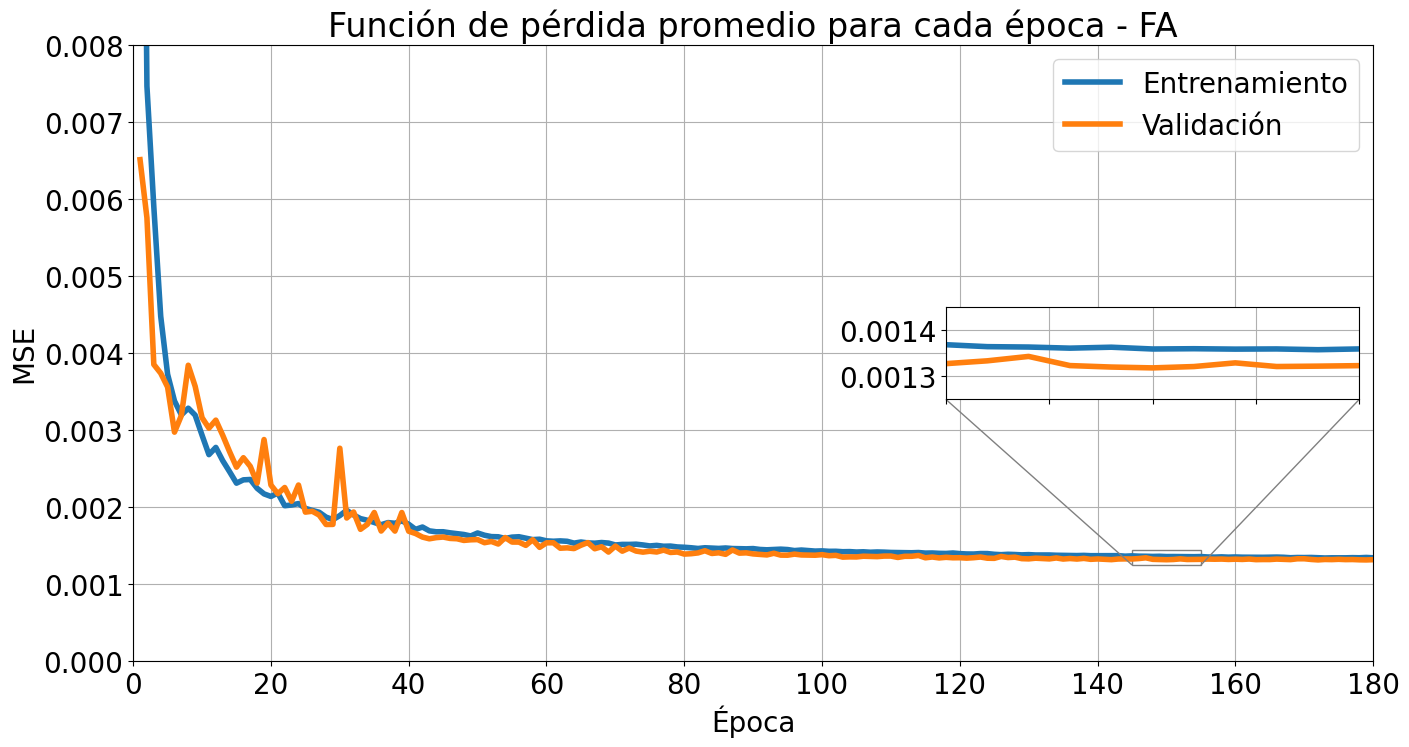

In [30]:
fig, ax = plt.subplots(figsize=(16,8))
x = range(1, len(loss_data) + 1)
plt.plot(x, loss_data, linewidth=4)
plt.title("Función de pérdida promedio para cada época - FA")
plt.ylabel("MSE")
plt.xlabel("Época")
plt.legend(['Entrenamiento', 'Validación'],loc="upper right")
plt.ylim([0, 0.008])
plt.xlim([0, 180])
plt.grid()
axins = zoomed_inset_axes(ax, 6, loc=5) # zoom = 6
axins.plot(x, loss_data, linewidth=4)
axins.set_xlim(145, 155) # Limit the region for zoom
axins.set_ylim(0.00125, 0.00145)
plt.xticks(visible=False)  # Not present ticks
## draw a bbox of the region of the inset axes in the parent axes and
## connecting lines between the bbox and the inset axes area
mark_inset(ax, axins, loc1=3, loc2=4, fc="none", ec="0.5")
plt.grid()
plt.draw()
plt.savefig(results_path+"/avg_loss_fa.png")
plt.show()

In [ ]:
# plot loss graphs
with open(results_path+'/MD/train_loss.csv', newline='') as f:
    reader = csv.reader(f)
    loss_data_md = list(reader)
loss_data_md = [[float(i) for i in li] for li in loss_data_md]

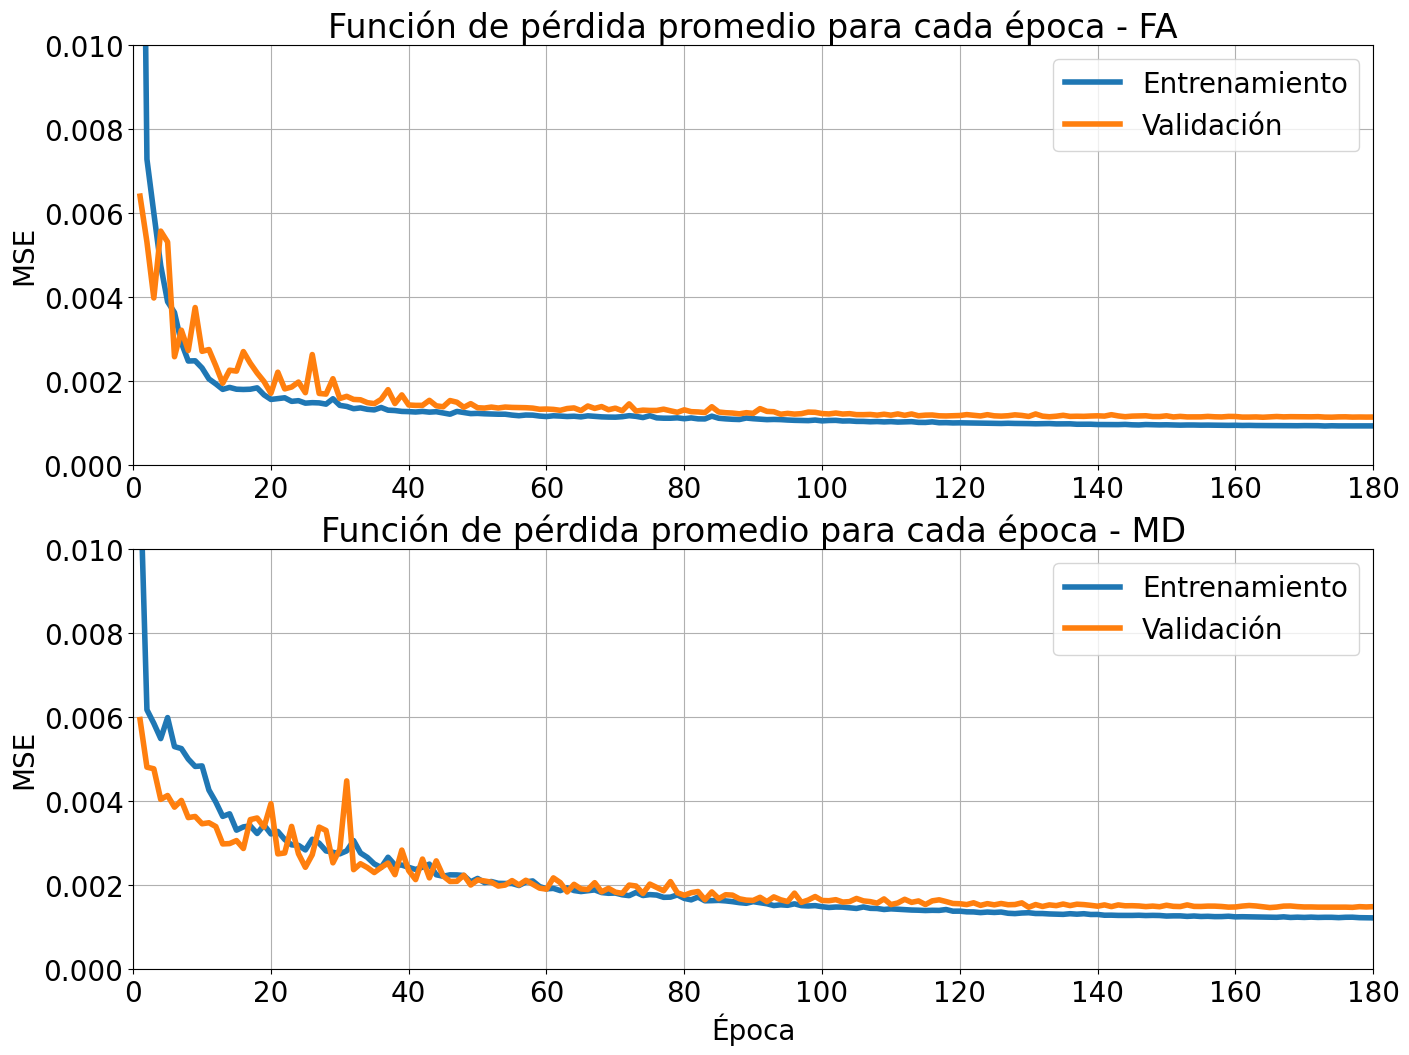

In [ ]:
fig=plt.figure(figsize=(16,12))
plt.subplot(2, 1, 1)
plt.plot(range(1, len(loss_data) + 1), loss_data, linewidth=4)
plt.title("Función de pérdida promedio para cada época - FA")
plt.ylabel("MSE")
plt.legend(['Entrenamiento', 'Validación'],loc="upper right")
plt.ylim([0, 0.01])
plt.xlim([0, 180])
plt.grid()
plt.subplot(2, 1, 2)
plt.plot(range(1, len(loss_data) + 1), loss_data_md, linewidth=4)
plt.title("Función de pérdida promedio para cada época - MD")
plt.ylabel("MSE")
plt.xlabel("Época")
plt.legend(['Entrenamiento', 'Validación'],loc="upper right")
plt.ylim([0, 0.01])
plt.xlim([0, 180])
plt.grid()
plt.savefig(results_path+"/avg_loss.png")